In [15]:
from numpy import mean
from numpy import std
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
import cv2

In [21]:
#Load dataset into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
#Reduce range from [0,255] to [0,1]
X_train = X_train / 255
X_test = X_test / 255

#images used are 28*28 in size
#INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC
img_row_size = 28
img_col_size = 28
no_of_classes = 10
model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(5,5), padding="same", activation="relu", input_shape=(img_row_size,img_col_size,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))
model.add(Conv2D(filters=50, kernel_size=(5,5), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=(2,2)))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(no_of_classes, activation="softmax"))
model.summary()

IndentationError: expected an indented block (Temp/ipykernel_3600/3340024709.py, line 10)

Building model...
Training the test set...


c:\users\mikel\pythonprojects\cnn\venv\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 47s 99ms/step - loss: 0.8488 - accuracy: 0.7785

TypeError: Invalid shape (10000, 28, 28, 1) for image data

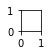

In [17]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print("Building model...")
trainer = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=trainer, metrics=["accuracy"])

#Training for 1 Epoch
print("Training the test set...")
model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1)

print("Evaluating trained test set...")
(loss, accuracy) = model.evaluate(X_test, y_test,
		batch_size=128, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

for i in np.random.choice(np.arange(0, len(y_test)), size=10):
	image = (X_test * 255)
	plt.imshow(image, cmap=plt.get_cmap('gray'))
	plt.show()
